# LSTM, GRU, LSTM+GRU 모델에 여러 변수 적용해보기 (변수선택)

# 시계열 알고리즘 epochs 100 두고 8개 조합 다 돌려보고, 각자 성능 가장 좋은 변수채택 (NEURON 사용 (클라우드슈퍼컴)) (맨 아랫줄 빼고 다 소용 X)

1. 15일치 종가 + 선택된변수 전체 15일치

2. 15일치 종가 + 선택된변수 하나씩 15일치

3. 15일치 종가 + 선택된변수 두개이상(2~7개) 조합 15일치

In [1]:
from pykrx import stock
from pykrx import bond
import pandas as pd
import math
import datetime as dt
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU



from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns

1. 15일치 종가 + 선택된변수 전체 15일치 적용

In [4]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(15,8)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
gru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(15,8), activation='tanh'))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstmgru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(16, return_sequences=True,input_shape=(15,8), activation='tanh'))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstm_r2 = r2_score(y_test,test_predict)
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

r2_li = [lstm_r2, gru_r2, lstmgru_r2]



data = {'algorithm':['lstm', 'gru', 'lstmgru'], 
        'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
        'r2': [lstm_r2, gru_r2, lstmgru_r2]}

comparison1 = pd.DataFrame(data)

comparison1.sort_values(['r2'], ascending=False)


Epoch 1/10
167/167 [==============================] - 20s 51ms/step - loss: 0.0078 - val_loss: 7.9998e-04
Epoch 2/10
167/167 [==============================] - 6s 37ms/step - loss: 0.0010 - val_loss: 6.5751e-04
Epoch 3/10
167/167 [==============================] - 6s 39ms/step - loss: 6.7338e-04 - val_loss: 3.8098e-04
Epoch 4/10
167/167 [==============================] - 7s 40ms/step - loss: 6.5717e-04 - val_loss: 4.5043e-04
Epoch 5/10
167/167 [==============================] - 6s 38ms/step - loss: 6.2089e-04 - val_loss: 5.7921e-04
Epoch 6/10
167/167 [==============================] - 7s 40ms/step - loss: 5.7241e-04 - val_loss: 0.0010
Epoch 7/10
167/167 [==============================] - 6s 38ms/step - loss: 6.2652e-04 - val_loss: 3.7105e-04
Epoch 8/10
167/167 [==============================] - 6s 38ms/step - loss: 4.7826e-04 - val_loss: 4.7737e-04
Epoch 9/10
167/167 [==============================] - 6s 38ms/step - loss: 5.0433e-04 - val_loss: 3.5488e-04
Epoch 10/10
167/167 [=========

,algorithm,rmse,r2
2,lstmgru,1415.627774,0.958043
1,gru,1642.695904,0.943504
0,lstm,1757.901639,0.935301


In [8]:
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [1757.901639, 1642.695904, 1415.627774]

r2_li = [0.935301, 0.943504, 0.958043]

data = {'algorithm':algo_li, 
        'rmse': rmse_li, 
        'r2': r2_li}

comparison1 = pd.DataFrame(data)

comparison1.sort_values(['r2'], ascending=False)

,algorithm,rmse,r2
2,lstmgru,1415.627774,0.958043
1,gru,1642.695904,0.943504
0,lstm,1757.901639,0.935301


2. 15일치 종가 + 15일치 WMA 적용

In [9]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :2]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(15,2)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
gru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :2]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstmgru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :2]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(16, return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstm_r2 = r2_score(y_test,test_predict)
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

r2_li = [lstm_r2, gru_r2, lstmgru_r2]



data = {'algorithm':['lstm', 'gru', 'lstmgru'], 
        'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
        'r2': [lstm_r2, gru_r2, lstmgru_r2]}

comparison2 = pd.DataFrame(data)

comparison2.sort_values(['r2'], ascending=False)


Epoch 1/10
167/167 [==============================] - 23s 58ms/step - loss: 0.0090 - val_loss: 7.6764e-04
Epoch 2/10
167/167 [==============================] - 6s 37ms/step - loss: 0.0012 - val_loss: 8.7523e-04
Epoch 3/10
167/167 [==============================] - 7s 40ms/step - loss: 8.9837e-04 - val_loss: 7.0420e-04
Epoch 4/10
167/167 [==============================] - 7s 40ms/step - loss: 7.4660e-04 - val_loss: 6.9941e-04
Epoch 5/10
167/167 [==============================] - 7s 42ms/step - loss: 6.0523e-04 - val_loss: 3.6951e-04
Epoch 6/10
167/167 [==============================] - 7s 43ms/step - loss: 5.4652e-04 - val_loss: 6.3628e-04
Epoch 7/10
167/167 [==============================] - 7s 41ms/step - loss: 4.7571e-04 - val_loss: 5.6482e-04
Epoch 8/10
167/167 [==============================] - 7s 42ms/step - loss: 5.2002e-04 - val_loss: 3.1983e-04
Epoch 9/10
167/167 [==============================] - 7s 40ms/step - loss: 6.0824e-04 - val_loss: 3.0849e-04
Epoch 10/10
167/167 [=====

,algorithm,rmse,r2
2,lstmgru,1292.377611,0.965031
0,lstm,1347.721478,0.961972
1,gru,1700.238859,0.939476


In [9]:
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [1347.721478, 1700.238859, 1292.377611]

r2_li = [0.961972, 0.939476, 0.965031]

data = {'algorithm':algo_li, 
        'rmse': rmse_li, 
        'r2': r2_li}

comparison2 = pd.DataFrame(data)

comparison2.sort_values(['r2'], ascending=False)

,algorithm,rmse,r2
2,lstmgru,1292.377611,0.965031
0,lstm,1347.721478,0.961972
1,gru,1700.238859,0.939476


3. 15일치 종가 + 15일치 MA5 적용

In [2]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,2]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(15,2)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
gru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,2]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstmgru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,2]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(16, return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstm_r2 = r2_score(y_test,test_predict)
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

r2_li = [lstm_r2, gru_r2, lstmgru_r2]



data = {'algorithm':['lstm', 'gru', 'lstmgru'], 
        'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
        'r2': [lstm_r2, gru_r2, lstmgru_r2]}

comparison3 = pd.DataFrame(data)

comparison3.sort_values(['r2'], ascending=False)


Epoch 1/10
167/167 [==============================] - 10s 22ms/step - loss: 0.0124 - val_loss: 9.9594e-04
Epoch 2/10
167/167 [==============================] - 3s 15ms/step - loss: 0.0012 - val_loss: 6.6990e-04
Epoch 3/10
167/167 [==============================] - 2s 15ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/10
167/167 [==============================] - 3s 16ms/step - loss: 8.4492e-04 - val_loss: 5.4449e-04
Epoch 5/10
167/167 [==============================] - 3s 16ms/step - loss: 6.8883e-04 - val_loss: 4.3617e-04
Epoch 6/10
167/167 [==============================] - 3s 16ms/step - loss: 6.6701e-04 - val_loss: 3.7126e-04
Epoch 7/10
167/167 [==============================] - 2s 15ms/step - loss: 6.0372e-04 - val_loss: 3.8847e-04
Epoch 8/10
167/167 [==============================] - 3s 15ms/step - loss: 4.9903e-04 - val_loss: 8.8467e-04
Epoch 9/10
167/167 [==============================] - 3s 16ms/step - loss: 5.7356e-04 - val_loss: 6.8968e-04
Epoch 10/10
167/167 [=============

,algorithm,rmse,r2
1,gru,981.260116,0.979841
2,lstmgru,1443.388452,0.956381
0,lstm,1922.163277,0.922645


In [10]:
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [1922.163277, 981.260116, 1443.388452]

r2_li = [0.922645, 0.979841, 0.956381]

data = {'algorithm':algo_li, 
        'rmse': rmse_li, 
        'r2': r2_li}

comparison3 = pd.DataFrame(data)

comparison3.sort_values(['r2'], ascending=False)

,algorithm,rmse,r2
1,gru,981.260116,0.979841
2,lstmgru,1443.388452,0.956381
0,lstm,1922.163277,0.922645


4. 15일치 종가 + 15일치 PER 적용

In [3]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,3]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(15,2)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
gru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,3]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstmgru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,3]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(16, return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstm_r2 = r2_score(y_test,test_predict)
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

r2_li = [lstm_r2, gru_r2, lstmgru_r2]



data = {'algorithm':['lstm', 'gru', 'lstmgru'], 
        'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
        'r2': [lstm_r2, gru_r2, lstmgru_r2]}

comparison4 = pd.DataFrame(data)

comparison4.sort_values(['r2'], ascending=False)


Epoch 1/10
167/167 [==============================] - 8s 21ms/step - loss: 0.0074 - val_loss: 7.8768e-04
Epoch 2/10
167/167 [==============================] - 3s 17ms/step - loss: 0.0011 - val_loss: 6.2476e-04
Epoch 3/10
167/167 [==============================] - 3s 17ms/step - loss: 0.0010 - val_loss: 5.4773e-04
Epoch 4/10
167/167 [==============================] - 3s 19ms/step - loss: 8.6783e-04 - val_loss: 0.0013
Epoch 5/10
167/167 [==============================] - 3s 21ms/step - loss: 9.0745e-04 - val_loss: 0.0013
Epoch 6/10
167/167 [==============================] - 4s 21ms/step - loss: 5.9486e-04 - val_loss: 6.6288e-04
Epoch 7/10
167/167 [==============================] - 4s 22ms/step - loss: 7.2354e-04 - val_loss: 0.0010
Epoch 8/10
167/167 [==============================] - 4s 22ms/step - loss: 5.4419e-04 - val_loss: 4.5564e-04
Epoch 9/10
167/167 [==============================] - 3s 21ms/step - loss: 7.1368e-04 - val_loss: 3.8844e-04
Epoch 10/10
167/167 [======================

,algorithm,rmse,r2
1,gru,963.301316,0.980572
2,lstmgru,1360.884338,0.961225
0,lstm,1672.307125,0.941449


In [12]:
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [1672.307125, 963.301316, 1360.884338]

r2_li = [0.941449, 0.980572, 0.961225]

data = {'algorithm':algo_li, 
        'rmse': rmse_li, 
        'r2': r2_li}

comparison4 = pd.DataFrame(data)

comparison4.sort_values(['r2'], ascending=False)

,algorithm,rmse,r2
1,gru,963.301316,0.980572
2,lstmgru,1360.884338,0.961225
0,lstm,1672.307125,0.941449


5. 15일치 종가 + 15일치 foreign_보유수량 적용

In [4]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,4]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(15,2)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
gru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,4]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstmgru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,4]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(16, return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstm_r2 = r2_score(y_test,test_predict)
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

r2_li = [lstm_r2, gru_r2, lstmgru_r2]



data = {'algorithm':algo_li, 
        'rmse': rmse_li, 
        'r2':r2_li}

comparison5 = pd.DataFrame(data)

comparison5.sort_values(['r2'], ascending=False)


Epoch 1/10
167/167 [==============================] - 9s 20ms/step - loss: 0.0084 - val_loss: 0.0016
Epoch 2/10
167/167 [==============================] - 3s 16ms/step - loss: 0.0015 - val_loss: 9.2806e-04
Epoch 3/10
167/167 [==============================] - 3s 18ms/step - loss: 0.0013 - val_loss: 5.8855e-04
Epoch 4/10
167/167 [==============================] - 3s 18ms/step - loss: 9.6357e-04 - val_loss: 5.5017e-04
Epoch 5/10
167/167 [==============================] - 3s 17ms/step - loss: 9.0016e-04 - val_loss: 7.2788e-04
Epoch 6/10
167/167 [==============================] - 3s 17ms/step - loss: 6.9417e-04 - val_loss: 5.4274e-04
Epoch 7/10
167/167 [==============================] - 3s 17ms/step - loss: 6.3606e-04 - val_loss: 0.0014
Epoch 8/10
167/167 [==============================] - 3s 16ms/step - loss: 6.4863e-04 - val_loss: 7.7236e-04
Epoch 9/10
167/167 [==============================] - 3s 16ms/step - loss: 5.5894e-04 - val_loss: 3.4743e-04
Epoch 10/10
167/167 [==================

,algorithm,rmse,r2
1,gru,955.410841,0.980889
0,lstm,1838.754578,0.929213
2,lstmgru,2212.965432,0.897469


In [14]:
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [1838.754578, 955.410841, 2212.965432]

r2_li = [0.929213, 0.980889, 0.897469]

data = {'algorithm':algo_li, 
        'rmse': rmse_li, 
        'r2': r2_li}

comparison5 = pd.DataFrame(data)

comparison5.sort_values(['r2'], ascending=False)

,algorithm,rmse,r2
1,gru,955.410841,0.980889
0,lstm,1838.754578,0.929213
2,lstmgru,2212.965432,0.897469


6. 15일치 종가 + 15일치 RSI 적용

In [5]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,5]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(15,2)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
gru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,5]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstmgru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,5]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(16, return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstm_r2 = r2_score(y_test,test_predict)
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

r2_li = [lstm_r2, gru_r2, lstmgru_r2]



data = {'algorithm':['lstm', 'gru', 'lstmgru'], 
        'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
        'r2': [lstm_r2, gru_r2, lstmgru_r2]}

comparison6 = pd.DataFrame(data)

comparison6.sort_values(['r2'], ascending=False)


Epoch 1/10
167/167 [==============================] - 9s 20ms/step - loss: 0.0119 - val_loss: 6.2447e-04
Epoch 2/10
167/167 [==============================] - 2s 15ms/step - loss: 8.7807e-04 - val_loss: 0.0020
Epoch 3/10
167/167 [==============================] - 3s 18ms/step - loss: 8.2758e-04 - val_loss: 9.3887e-04
Epoch 4/10
167/167 [==============================] - 3s 19ms/step - loss: 7.2965e-04 - val_loss: 7.2381e-04
Epoch 5/10
167/167 [==============================] - 3s 19ms/step - loss: 6.7080e-04 - val_loss: 4.5897e-04
Epoch 6/10
167/167 [==============================] - 3s 19ms/step - loss: 7.3408e-04 - val_loss: 3.6162e-04
Epoch 7/10
167/167 [==============================] - 3s 19ms/step - loss: 5.7228e-04 - val_loss: 0.0011
Epoch 8/10
167/167 [==============================] - 3s 19ms/step - loss: 5.4212e-04 - val_loss: 9.0144e-04
Epoch 9/10
167/167 [==============================] - 3s 20ms/step - loss: 5.3923e-04 - val_loss: 5.2380e-04
Epoch 10/10
167/167 [==========

,algorithm,rmse,r2
2,lstmgru,1109.281361,0.974237
0,lstm,1457.398074,0.955531
1,gru,1514.937648,0.951950


7. 15일치 종가 + 15일치 MOM 적용

In [6]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,6]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(15,2)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
gru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,6]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstmgru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,6]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(16, return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstm_r2 = r2_score(y_test,test_predict)
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

r2_li = [lstm_r2, gru_r2, lstmgru_r2]



data = {'algorithm':['lstm', 'gru', 'lstmgru'], 
        'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
        'r2': [lstm_r2, gru_r2, lstmgru_r2]}

comparison7 = pd.DataFrame(data)

comparison7.sort_values(['r2'], ascending=False)


Epoch 1/10
167/167 [==============================] - 9s 21ms/step - loss: 0.0116 - val_loss: 0.0012
Epoch 2/10
167/167 [==============================] - 2s 15ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 3/10
167/167 [==============================] - 3s 17ms/step - loss: 7.0884e-04 - val_loss: 6.2754e-04
Epoch 4/10
167/167 [==============================] - 3s 18ms/step - loss: 6.1816e-04 - val_loss: 6.6208e-04
Epoch 5/10
167/167 [==============================] - 3s 17ms/step - loss: 8.2093e-04 - val_loss: 0.0017
Epoch 6/10
167/167 [==============================] - 3s 17ms/step - loss: 6.0508e-04 - val_loss: 6.9522e-04
Epoch 7/10
167/167 [==============================] - 3s 17ms/step - loss: 5.5691e-04 - val_loss: 4.2820e-04
Epoch 8/10
167/167 [==============================] - 3s 16ms/step - loss: 5.3673e-04 - val_loss: 4.5200e-04
Epoch 9/10
167/167 [==============================] - 3s 16ms/step - loss: 4.8294e-04 - val_loss: 5.2221e-04
Epoch 10/10
167/167 [==================

,algorithm,rmse,r2
1,gru,1040.936192,0.977314
0,lstm,1664.600133,0.941987
2,lstmgru,1766.920144,0.934636


8. 15일치 종가 + 15일치 MA20 적용

In [7]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,7]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(15,2)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
gru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,7]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstmgru_r2 = r2_score(y_test,test_predict)

df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,7]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(16, return_sequences=True,input_shape=(15,2), activation='tanh'))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lstm_r2 = r2_score(y_test,test_predict)
algo_li = ['lstm', 'gru', 'lstmgru']

rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

r2_li = [lstm_r2, gru_r2, lstmgru_r2]



data = {'algorithm':['lstm', 'gru', 'lstmgru'], 
        'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
        'r2': [lstm_r2, gru_r2, lstmgru_r2]}

comparison8 = pd.DataFrame(data)

comparison8.sort_values(['r2'], ascending=False)


Epoch 1/10
167/167 [==============================] - 9s 23ms/step - loss: 0.0079 - val_loss: 0.0014
Epoch 2/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0010 - val_loss: 8.7775e-04
Epoch 3/10
167/167 [==============================] - 3s 21ms/step - loss: 0.0011 - val_loss: 9.5857e-04
Epoch 4/10
167/167 [==============================] - 4s 21ms/step - loss: 6.7638e-04 - val_loss: 4.0213e-04
Epoch 5/10
167/167 [==============================] - 4s 24ms/step - loss: 5.6860e-04 - val_loss: 3.8089e-04
Epoch 6/10
167/167 [==============================] - 4s 23ms/step - loss: 5.5522e-04 - val_loss: 4.9274e-04
Epoch 7/10
167/167 [==============================] - 4s 23ms/step - loss: 5.9682e-04 - val_loss: 4.2413e-04
Epoch 8/10
167/167 [==============================] - 3s 21ms/step - loss: 4.6712e-04 - val_loss: 5.8886e-04
Epoch 9/10
167/167 [==============================] - 4s 21ms/step - loss: 5.3075e-04 - val_loss: 3.1758e-04
Epoch 10/10
167/167 [==============

,algorithm,rmse,r2
1,gru,983.835265,0.979735
2,lstmgru,1449.563573,0.956007
0,lstm,2656.804512,0.852217


In [23]:
comparison1['rmse_mean'] = comparison1['rmse'].mean()
comparison2['rmse_mean'] = comparison2['rmse'].mean()
comparison3['rmse_mean'] = comparison3['rmse'].mean()
comparison4['rmse_mean'] = comparison4['rmse'].mean()
comparison5['rmse_mean'] = comparison5['rmse'].mean()
comparison6['rmse_mean'] = comparison6['rmse'].mean()
comparison7['rmse_mean'] = comparison7['rmse'].mean()
comparison8['rmse_mean'] = comparison8['rmse'].mean()

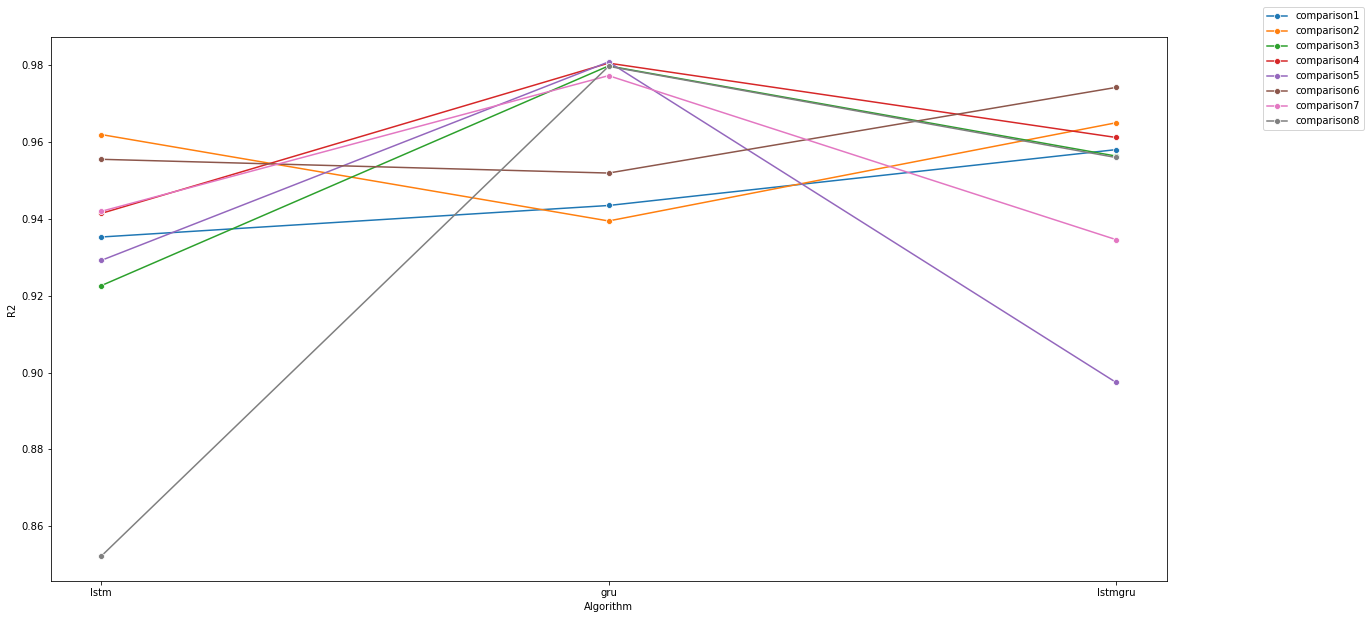

In [20]:
# 그래프 그리기

plt.figure(figsize=(20, 10))
sns.lineplot(x='algorithm', y='r2', data=comparison1, marker='o', label='comparison1')
sns.lineplot(x='algorithm', y='r2', data=comparison2, marker='o', label='comparison2')
sns.lineplot(x='algorithm', y='r2', data=comparison3, marker='o', label='comparison3')
sns.lineplot(x='algorithm', y='r2', data=comparison4, marker='o', label='comparison4')
sns.lineplot(x='algorithm', y='r2', data=comparison5, marker='o', label='comparison5')
sns.lineplot(x='algorithm', y='r2', data=comparison6, marker='o', label='comparison6')
sns.lineplot(x='algorithm', y='r2', data=comparison7, marker='o', label='comparison7')
sns.lineplot(x='algorithm', y='r2', data=comparison8, marker='o', label='comparison8')


plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), borderaxespad=-3)

plt.xlabel('Algorithm')
plt.ylabel('R2')



plt.show()

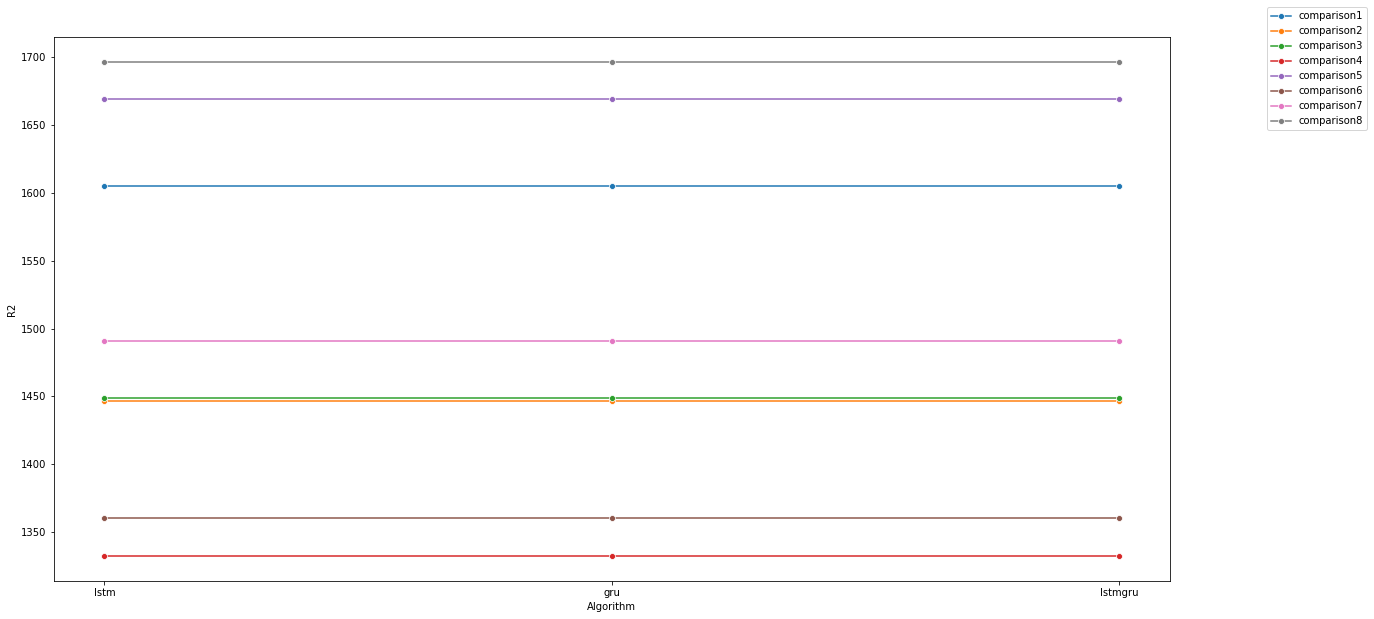

In [22]:
# 그래프 그리기

plt.figure(figsize=(20, 10))
sns.lineplot(x='algorithm', y='rmse_mean', data=comparison1, marker='o', label='comparison1')
sns.lineplot(x='algorithm', y='rmse_mean', data=comparison2, marker='o', label='comparison2')
sns.lineplot(x='algorithm', y='rmse_mean', data=comparison3, marker='o', label='comparison3')
sns.lineplot(x='algorithm', y='rmse_mean', data=comparison4, marker='o', label='comparison4')
sns.lineplot(x='algorithm', y='rmse_mean', data=comparison5, marker='o', label='comparison5')
sns.lineplot(x='algorithm', y='rmse_mean', data=comparison6, marker='o', label='comparison6')
sns.lineplot(x='algorithm', y='rmse_mean', data=comparison7, marker='o', label='comparison7')
sns.lineplot(x='algorithm', y='rmse_mean', data=comparison8, marker='o', label='comparison8')


plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), borderaxespad=-3)

plt.xlabel('Algorithm')
plt.ylabel('R2')



plt.show()

# LSTM, GRU, RMSE 기준 15일치 종가 + 15일치 PER 채택

3. 15일치 종가 + 선택된변수 두개이상(2~7개) 조합 15일치

In [10]:
from itertools import combinations
li = []
for r in range(2, 7):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
li

[[1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [4, 5],
 [4, 6],
 [4, 7],
 [5, 6],
 [5, 7],
 [6, 7],
 [1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 2, 6],
 [1, 2, 7],
 [1, 3, 4],
 [1, 3, 5],
 [1, 3, 6],
 [1, 3, 7],
 [1, 4, 5],
 [1, 4, 6],
 [1, 4, 7],
 [1, 5, 6],
 [1, 5, 7],
 [1, 6, 7],
 [2, 3, 4],
 [2, 3, 5],
 [2, 3, 6],
 [2, 3, 7],
 [2, 4, 5],
 [2, 4, 6],
 [2, 4, 7],
 [2, 5, 6],
 [2, 5, 7],
 [2, 6, 7],
 [3, 4, 5],
 [3, 4, 6],
 [3, 4, 7],
 [3, 5, 6],
 [3, 5, 7],
 [3, 6, 7],
 [4, 5, 6],
 [4, 5, 7],
 [4, 6, 7],
 [5, 6, 7],
 [1, 2, 3, 4],
 [1, 2, 3, 5],
 [1, 2, 3, 6],
 [1, 2, 3, 7],
 [1, 2, 4, 5],
 [1, 2, 4, 6],
 [1, 2, 4, 7],
 [1, 2, 5, 6],
 [1, 2, 5, 7],
 [1, 2, 6, 7],
 [1, 3, 4, 5],
 [1, 3, 4, 6],
 [1, 3, 4, 7],
 [1, 3, 5, 6],
 [1, 3, 5, 7],
 [1, 3, 6, 7],
 [1, 4, 5, 6],
 [1, 4, 5, 7],
 [1, 4, 6, 7],
 [1, 5, 6, 7],
 [2, 3, 4, 5],
 [2, 3, 4, 6],
 [2, 3, 4, 7],
 [2, 3, 5, 6],
 [2, 3, 5, 7],
 [2, 3, 6, 7],
 

In [11]:
from itertools import combinations
li = []
for r in range(1, 7):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
li

[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [4, 5],
 [4, 6],
 [4, 7],
 [5, 6],
 [5, 7],
 [6, 7],
 [1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 2, 6],
 [1, 2, 7],
 [1, 3, 4],
 [1, 3, 5],
 [1, 3, 6],
 [1, 3, 7],
 [1, 4, 5],
 [1, 4, 6],
 [1, 4, 7],
 [1, 5, 6],
 [1, 5, 7],
 [1, 6, 7],
 [2, 3, 4],
 [2, 3, 5],
 [2, 3, 6],
 [2, 3, 7],
 [2, 4, 5],
 [2, 4, 6],
 [2, 4, 7],
 [2, 5, 6],
 [2, 5, 7],
 [2, 6, 7],
 [3, 4, 5],
 [3, 4, 6],
 [3, 4, 7],
 [3, 5, 6],
 [3, 5, 7],
 [3, 6, 7],
 [4, 5, 6],
 [4, 5, 7],
 [4, 6, 7],
 [5, 6, 7],
 [1, 2, 3, 4],
 [1, 2, 3, 5],
 [1, 2, 3, 6],
 [1, 2, 3, 7],
 [1, 2, 4, 5],
 [1, 2, 4, 6],
 [1, 2, 4, 7],
 [1, 2, 5, 6],
 [1, 2, 5, 7],
 [1, 2, 6, 7],
 [1, 3, 4, 5],
 [1, 3, 4, 6],
 [1, 3, 4, 7],
 [1, 3, 5, 6],
 [1, 3, 5, 7],
 [1, 3, 6, 7],
 [1, 4, 5, 6],
 [1, 4, 5, 7],
 [1, 4, 6, 7],
 [1, 5, 6, 7],
 [2, 3, 4, 5],
 [2, 3, 4, 6],
 [2, 3, 4, 7],
 [2,

In [61]:
from itertools import combinations

li = []

for r in range(2, 7):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)


combili = []
        
for kk in li :
    
    kk.append(0)
#     print(kk)
    df = pd.read_csv('./stock_v11.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 15
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)


    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(GRU(32,return_sequences=True,input_shape=(15,len(kk))))
    model.add(GRU(32,return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')


    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    train_predict.shape, test_predict.shape

    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val



    gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    gru_r2 = r2_score(y_test,test_predict)
    

    df = pd.read_csv('./stock_v11.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 15
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(LSTM(32,return_sequences=True,input_shape=(15,len(kk)), activation='tanh'))
    model.add(LSTM(32,return_sequences=True))
    model.add(GRU(32,return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')


    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)


    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val


    lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    lstmgru_r2 = r2_score(y_test,test_predict)

    df = pd.read_csv('./stock_v11.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 15
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)


    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(LSTM(16, return_sequences=True,input_shape=(15,len(kk)), activation='tanh'))
    model.add(LSTM(16, return_sequences=False))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')


    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)


    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)


    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val



    lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    lstm_r2 = r2_score(y_test,test_predict)
    algo_li = ['lstm', 'gru', 'lstmgru']

    rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

    r2_li = [lstm_r2, gru_r2, lstmgru_r2]

    def listToString(str_list):
        result = ""
        for s in str_list:
            result += s + " "
        return result.strip()


    col_li = list(df.iloc[:,kk].columns)
    result = listToString(col_li)
    
    
    data = {'data' : result,
        'algorithm':['lstm', 'gru', 'lstmgru'], 
            'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
            'r2': [lstm_r2, gru_r2, lstmgru_r2]}

    comparison = pd.DataFrame(data)

    comparison = comparison.sort_values(['r2'], ascending=False)
    
    combili.append(comparison)


Epoch 1/10
167/167 [==============================] - 8s 21ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 2/10
167/167 [==============================] - 3s 15ms/step - loss: 0.0012 - val_loss: 7.5056e-04
Epoch 3/10
167/167 [==============================] - 3s 15ms/step - loss: 9.4554e-04 - val_loss: 6.9112e-04
Epoch 4/10
167/167 [==============================] - 3s 15ms/step - loss: 8.6338e-04 - val_loss: 4.9314e-04
Epoch 5/10
167/167 [==============================] - 3s 15ms/step - loss: 7.3980e-04 - val_loss: 8.3944e-04
Epoch 6/10
167/167 [==============================] - 3s 16ms/step - loss: 5.9694e-04 - val_loss: 3.9041e-04
Epoch 7/10
167/167 [==============================] - 3s 16ms/step - loss: 5.4102e-04 - val_loss: 3.3467e-04
Epoch 8/10
167/167 [==============================] - 3s 16ms/step - loss: 6.2461e-04 - val_loss: 6.2110e-04
Epoch 9/10
167/167 [==============================] - 3s 16ms/step - loss: 5.2378e-04 - val_loss: 0.0020
Epoch 10/10
167/167 [==============

Epoch 10/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0012 - val_loss: 6.8665e-04
Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0218 - val_loss: 0.0034
Epoch 2/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 4/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 5/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 6/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 7/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 8/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0015 - val_loss: 

167/167 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 9/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0012 - val_loss: 7.6001e-04
Epoch 10/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 1/10
167/167 [==============================] - 8s 20ms/step - loss: 0.0090 - val_loss: 0.0010
Epoch 2/10
167/167 [==============================] - 3s 15ms/step - loss: 0.0011 - val_loss: 6.1438e-04
Epoch 3/10
167/167 [==============================] - 3s 20ms/step - loss: 8.8072e-04 - val_loss: 0.0018
Epoch 4/10
167/167 [==============================] - 3s 21ms/step - loss: 7.6247e-04 - val_loss: 5.3247e-04
Epoch 5/10
167/167 [==============================] - 3s 20ms/step - loss: 6.2261e-04 - val_loss: 8.2119e-04
Epoch 6/10
167/167 [==============================] - 3s 20ms/step - loss:

167/167 [==============================] - 3s 19ms/step - loss: 6.9655e-04 - val_loss: 5.2607e-04
Epoch 5/10
167/167 [==============================] - 3s 20ms/step - loss: 6.5012e-04 - val_loss: 6.8761e-04
Epoch 6/10
167/167 [==============================] - 3s 19ms/step - loss: 6.4490e-04 - val_loss: 4.4382e-04
Epoch 7/10
167/167 [==============================] - 3s 19ms/step - loss: 6.0631e-04 - val_loss: 5.2613e-04
Epoch 8/10
167/167 [==============================] - 3s 20ms/step - loss: 5.1851e-04 - val_loss: 4.3122e-04
Epoch 9/10
167/167 [==============================] - 3s 20ms/step - loss: 5.2266e-04 - val_loss: 5.4713e-04
Epoch 10/10
167/167 [==============================] - 3s 20ms/step - loss: 5.6950e-04 - val_loss: 3.3982e-04
Epoch 1/10
167/167 [==============================] - 10s 25ms/step - loss: 0.0110 - val_loss: 0.0047
Epoch 2/10
167/167 [==============================] - 4s 22ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 3/10
167/167 [========================

167/167 [==============================] - 3s 19ms/step - loss: 5.0836e-04 - val_loss: 4.8190e-04
Epoch 1/10
167/167 [==============================] - 10s 25ms/step - loss: 0.0148 - val_loss: 0.0017
Epoch 2/10
167/167 [==============================] - 3s 18ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 3/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0020 - val_loss: 9.7161e-04
Epoch 4/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0016 - val_loss: 7.5716e-04
Epoch 5/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0014 - val_loss: 7.8981e-04
Epoch 6/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 7/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/10
167/167 [==============================] - 3s 20ms/step - loss: 9.6442

Epoch 7/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 8/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/10
167/167 [==============================] - 3s 19ms/step - loss: 8.0294e-04 - val_loss: 5.8324e-04
Epoch 10/10
167/167 [==============================] - 3s 19ms/step - loss: 9.1210e-04 - val_loss: 6.2987e-04
Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0105 - val_loss: 0.0017
Epoch 2/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 4/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0012 - val_loss: 7.7252e-04
Epoch 5/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 7.3115e-04
Epoch 6/10
167/167 [==============================] - 1s 9ms/step - lo

167/167 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0013 - val_loss: 8.8747e-04
Epoch 5/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0012 - val_loss: 8.7176e-04
Epoch 6/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0010 - val_loss: 6.6680e-04
Epoch 8/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0010 - val_loss: 6.9637e-04
Epoch 9/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0011 - val_loss: 7.4791e-04
Epoch 10/10
167/167 [==============================] - 2s 10ms/step - loss: 9.1775e-04 - val_loss: 6.5590e-04
Epoch 1/10
167/167 [==============================] - 8s 22ms/step - loss: 0.0115 - val_loss: 0.0012
Epoch 2/10
167/167 [==============================] - 3s 16ms/step - loss: 0.00

Epoch 2/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0027 - val_loss: 0.0069
Epoch 3/10
167/167 [==============================] - 4s 23ms/step - loss: 0.0022 - val_loss: 0.0071
Epoch 4/10
167/167 [==============================] - 4s 24ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 5/10
167/167 [==============================] - 4s 24ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 6/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0015 - val_loss: 0.0058
Epoch 7/10
167/167 [==============================] - 5s 28ms/step - loss: 0.0016 - val_loss: 6.7488e-04
Epoch 8/10
167/167 [==============================] - 4s 24ms/step - loss: 0.0011 - val_loss: 7.5823e-04
Epoch 9/10
167/167 [==============================] - 4s 23ms/step - loss: 9.1590e-04 - val_loss: 0.0013
Epoch 10/10
167/167 [==============================] - 4s 23ms/step - loss: 9.6534e-04 - val_loss: 0.0011
Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss:

167/167 [==============================] - 3s 19ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 10/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0211 - val_loss: 0.0017
Epoch 2/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 3/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 4/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 6/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 7/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9

Epoch 8/10
167/167 [==============================] - 3s 16ms/step - loss: 4.6900e-04 - val_loss: 3.0958e-04
Epoch 9/10
167/167 [==============================] - 3s 15ms/step - loss: 4.3046e-04 - val_loss: 7.9094e-04
Epoch 10/10
167/167 [==============================] - 3s 15ms/step - loss: 4.9620e-04 - val_loss: 0.0022
Epoch 1/10
167/167 [==============================] - 10s 26ms/step - loss: 0.0067 - val_loss: 0.0035
Epoch 2/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 3/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 5/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 6/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/10
167/167 [==============================] - 4s 22ms/step - 

167/167 [==============================] - 4s 25ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 5/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0016 - val_loss: 0.0030
Epoch 6/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 7/10
167/167 [==============================] - 5s 29ms/step - loss: 0.0011 - val_loss: 8.0378e-04
Epoch 8/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0012 - val_loss: 6.6027e-04
Epoch 9/10
167/167 [==============================] - 4s 25ms/step - loss: 9.7782e-04 - val_loss: 5.7243e-04
Epoch 10/10
167/167 [==============================] - 4s 24ms/step - loss: 0.0010 - val_loss: 7.4656e-04
Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0118 - val_loss: 0.0027
Epoch 2/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0015 -

Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0069 - val_loss: 0.0026
Epoch 2/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 9.9972e-04
Epoch 4/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0013 - val_loss: 8.4974e-04
Epoch 5/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0012 - val_loss: 7.7857e-04
Epoch 6/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 7.6849e-04
Epoch 8/10
167/167 [==============================] - 2s 9ms/step - loss: 9.1840e-04 - val_loss: 8.0433e-04
Epoch 9/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/10
167/167 [==============================] - 1s 9ms/step - loss: 

167/167 [==============================] - 2s 10ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 9/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0010 - val_loss: 5.6886e-04
Epoch 10/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 1/10
167/167 [==============================] - 8s 20ms/step - loss: 0.0085 - val_loss: 9.0155e-04
Epoch 2/10
167/167 [==============================] - 3s 15ms/step - loss: 9.8895e-04 - val_loss: 8.2728e-04
Epoch 3/10
167/167 [==============================] - 3s 16ms/step - loss: 7.6595e-04 - val_loss: 4.6328e-04
Epoch 4/10
167/167 [==============================] - 3s 16ms/step - loss: 7.3031e-04 - val_loss: 6.2639e-04
Epoch 5/10
167/167 [==============================] - 3s 15ms/step - loss: 8.0514e-04 - val_loss: 8.1520e-04
Epoch 6/10
167/167 [==============================] - 3s 16ms/step - loss: 6.9395e-04 - val_loss: 5.4372e-04
Epoch 7/10
167/167 [==============================] -

167/167 [==============================] - 3s 20ms/step - loss: 5.8223e-04 - val_loss: 0.0016
Epoch 6/10
167/167 [==============================] - 3s 19ms/step - loss: 5.9427e-04 - val_loss: 8.9208e-04
Epoch 7/10
167/167 [==============================] - 3s 19ms/step - loss: 6.7049e-04 - val_loss: 3.4607e-04
Epoch 8/10
167/167 [==============================] - 3s 20ms/step - loss: 5.7717e-04 - val_loss: 4.6258e-04
Epoch 9/10
167/167 [==============================] - 3s 20ms/step - loss: 5.8627e-04 - val_loss: 0.0015
Epoch 10/10
167/167 [==============================] - 3s 20ms/step - loss: 6.2989e-04 - val_loss: 4.5657e-04
Epoch 1/10
167/167 [==============================] - 10s 26ms/step - loss: 0.0104 - val_loss: 0.0013
Epoch 2/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 3/10
167/167 [==============================] - 4s 23ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 4/10
167/167 [==============================] - 4s 22m

Epoch 4/10
167/167 [==============================] - 2s 12ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 5/10
167/167 [==============================] - 2s 11ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/10
167/167 [==============================] - 2s 12ms/step - loss: 0.0017 - val_loss: 9.2634e-04
Epoch 7/10
167/167 [==============================] - 2s 12ms/step - loss: 0.0015 - val_loss: 9.4668e-04
Epoch 8/10
167/167 [==============================] - 2s 11ms/step - loss: 0.0013 - val_loss: 9.0412e-04
Epoch 9/10
167/167 [==============================] - 2s 12ms/step - loss: 0.0011 - val_loss: 9.8858e-04
Epoch 10/10
167/167 [==============================] - 2s 11ms/step - loss: 0.0011 - val_loss: 8.8437e-04
Epoch 1/10
167/167 [==============================] - 8s 21ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 2/10
167/167 [==============================] - 3s 16ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 3/10
167/167 [==============================] - 3s 19ms/step - l

Epoch 2/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 3/10
167/167 [==============================] - 4s 21ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/10
167/167 [==============================] - 4s 24ms/step - loss: 0.0017 - val_loss: 9.0464e-04
Epoch 5/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0018 - val_loss: 9.6156e-04
Epoch 6/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0018 - val_loss: 9.2370e-04
Epoch 7/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0018 - val_loss: 6.1174e-04
Epoch 9/10
167/167 [==============================] - 4s 25ms/step - loss: 8.2290e-04 - val_loss: 4.8974e-04
Epoch 10/10
167/167 [==============================] - 4s 25ms/step - loss: 7.0460e-04 - val_loss: 7.4919e-04
Epoch 1/10
167/167 [==============================] - 5s 1

167/167 [==============================] - 3s 20ms/step - loss: 0.0010 - val_loss: 7.8915e-04
Epoch 9/10
167/167 [==============================] - 3s 20ms/step - loss: 7.9543e-04 - val_loss: 7.0146e-04
Epoch 10/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0010 - val_loss: 7.4913e-04
Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0092 - val_loss: 0.0014
Epoch 2/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 4/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 5/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 8.0031e-04
Epoch 7/10
167/167 [==============================] - 2s 9ms/step - loss: 9.8234e-04 

167/167 [==============================] - 2s 14ms/step - loss: 0.0011 - val_loss: 8.3757e-04
Epoch 5/10
167/167 [==============================] - 2s 14ms/step - loss: 0.0010 - val_loss: 6.6895e-04
Epoch 6/10
167/167 [==============================] - 2s 15ms/step - loss: 9.3172e-04 - val_loss: 8.3865e-04
Epoch 7/10
167/167 [==============================] - 2s 14ms/step - loss: 8.2056e-04 - val_loss: 8.6041e-04
Epoch 8/10
167/167 [==============================] - 2s 12ms/step - loss: 8.0850e-04 - val_loss: 6.5353e-04
Epoch 9/10
167/167 [==============================] - 2s 12ms/step - loss: 7.7954e-04 - val_loss: 0.0010
Epoch 10/10
167/167 [==============================] - 2s 13ms/step - loss: 8.2912e-04 - val_loss: 5.2341e-04
Epoch 1/10
167/167 [==============================] - 8s 21ms/step - loss: 0.0075 - val_loss: 0.0011
Epoch 2/10
167/167 [==============================] - 3s 18ms/step - loss: 8.2989e-04 - val_loss: 0.0010
Epoch 3/10
167/167 [==============================] -

167/167 [==============================] - 2s 10ms/step - loss: 0.0010 - val_loss: 8.1245e-04
Epoch 1/10
167/167 [==============================] - 7s 21ms/step - loss: 0.0051 - val_loss: 0.0012
Epoch 2/10
167/167 [==============================] - 3s 16ms/step - loss: 0.0011 - val_loss: 5.2368e-04
Epoch 3/10
167/167 [==============================] - 3s 16ms/step - loss: 8.5736e-04 - val_loss: 0.0013
Epoch 4/10
167/167 [==============================] - 3s 16ms/step - loss: 7.1085e-04 - val_loss: 0.0012
Epoch 5/10
167/167 [==============================] - 3s 16ms/step - loss: 8.6984e-04 - val_loss: 5.8591e-04
Epoch 6/10
167/167 [==============================] - 3s 16ms/step - loss: 6.3918e-04 - val_loss: 4.1740e-04
Epoch 7/10
167/167 [==============================] - 3s 16ms/step - loss: 5.9858e-04 - val_loss: 3.8893e-04
Epoch 8/10
167/167 [==============================] - 3s 16ms/step - loss: 5.4061e-04 - val_loss: 7.6102e-04
Epoch 9/10
167/167 [==============================] - 

Epoch 7/10
167/167 [==============================] - 3s 16ms/step - loss: 6.4290e-04 - val_loss: 3.8171e-04
Epoch 8/10
167/167 [==============================] - 3s 16ms/step - loss: 6.1837e-04 - val_loss: 3.6863e-04
Epoch 9/10
167/167 [==============================] - 3s 16ms/step - loss: 7.2056e-04 - val_loss: 7.2880e-04
Epoch 10/10
167/167 [==============================] - 3s 16ms/step - loss: 5.3767e-04 - val_loss: 7.6246e-04
Epoch 1/10
167/167 [==============================] - 10s 27ms/step - loss: 0.0102 - val_loss: 0.0021
Epoch 2/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 3/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 4/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0019 - val_loss: 0.0043
Epoch 5/10
167/167 [==============================] - 3s 20ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 6/10
167/167 [==============================] - 3s 

Epoch 6/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0013 - val_loss: 9.9488e-04
Epoch 7/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 6.3787e-04
Epoch 8/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 9/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0011 - val_loss: 6.5809e-04
Epoch 10/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0011 - val_loss: 9.0300e-04
Epoch 1/10
167/167 [==============================] - 8s 21ms/step - loss: 0.0098 - val_loss: 7.1507e-04
Epoch 2/10
167/167 [==============================] - 3s 16ms/step - loss: 0.0013 - val_loss: 6.8244e-04
Epoch 3/10
167/167 [==============================] - 3s 16ms/step - loss: 9.0153e-04 - val_loss: 5.4416e-04
Epoch 4/10
167/167 [==============================] - 3s 16ms/step - loss: 7.1950e-04 - val_loss: 6.9678e-04
Epoch 5/10
167/167 [==============================] - 3

Epoch 4/10
167/167 [==============================] - 4s 22ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 5/10
167/167 [==============================] - 4s 23ms/step - loss: 0.0021 - val_loss: 7.8965e-04
Epoch 6/10
167/167 [==============================] - 4s 22ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 7/10
167/167 [==============================] - 4s 21ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 8/10
167/167 [==============================] - 3s 21ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 9/10
167/167 [==============================] - 3s 20ms/step - loss: 8.8261e-04 - val_loss: 4.5640e-04
Epoch 10/10
167/167 [==============================] - 3s 20ms/step - loss: 8.0586e-04 - val_loss: 9.5776e-04
Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 2/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 3/10
167/167 [==============================] - 2s 9ms/step - los

Epoch 3/10
167/167 [==============================] - 3s 16ms/step - loss: 0.0011 - val_loss: 4.5559e-04
Epoch 4/10
167/167 [==============================] - 3s 16ms/step - loss: 9.1403e-04 - val_loss: 4.9280e-04
Epoch 5/10
167/167 [==============================] - 3s 16ms/step - loss: 8.2808e-04 - val_loss: 8.8578e-04
Epoch 6/10
167/167 [==============================] - 3s 17ms/step - loss: 6.7320e-04 - val_loss: 3.4673e-04
Epoch 7/10
167/167 [==============================] - 3s 19ms/step - loss: 5.7964e-04 - val_loss: 5.4148e-04
Epoch 8/10
167/167 [==============================] - 3s 19ms/step - loss: 5.3332e-04 - val_loss: 5.7134e-04
Epoch 9/10
167/167 [==============================] - 3s 20ms/step - loss: 5.9881e-04 - val_loss: 4.3480e-04
Epoch 10/10
167/167 [==============================] - 3s 20ms/step - loss: 5.2717e-04 - val_loss: 4.9602e-04
Epoch 1/10
167/167 [==============================] - 10s 30ms/step - loss: 0.0080 - val_loss: 0.0032
Epoch 2/10
167/167 [=========

Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0199 - val_loss: 0.0036
Epoch 2/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0014 - val_loss: 7.3815e-04
Epoch 10/10
167/167 [==============================] - 2s 10ms/step - loss: 0.0013 - val_loss: 

167/167 [==============================] - 2s 9ms/step - loss: 0.0010 - val_loss: 7.8738e-04
Epoch 8/10
167/167 [==============================] - 2s 9ms/step - loss: 9.3690e-04 - val_loss: 7.6920e-04
Epoch 9/10
167/167 [==============================] - 2s 9ms/step - loss: 0.0010 - val_loss: 6.1808e-04
Epoch 10/10
167/167 [==============================] - 1s 9ms/step - loss: 8.4264e-04 - val_loss: 7.5689e-04
Epoch 1/10
167/167 [==============================] - 8s 21ms/step - loss: 0.0107 - val_loss: 7.6533e-04
Epoch 2/10
167/167 [==============================] - 3s 16ms/step - loss: 0.0011 - val_loss: 8.1825e-04
Epoch 3/10
167/167 [==============================] - 3s 16ms/step - loss: 8.6663e-04 - val_loss: 0.0011
Epoch 4/10
167/167 [==============================] - 3s 16ms/step - loss: 8.0386e-04 - val_loss: 6.0213e-04
Epoch 5/10
167/167 [==============================] - 3s 16ms/step - loss: 6.7512e-04 - val_loss: 3.8053e-04
Epoch 6/10
167/167 [==============================] -

167/167 [==============================] - 3s 19ms/step - loss: 8.7762e-04 - val_loss: 4.6064e-04
Epoch 4/10
167/167 [==============================] - 3s 18ms/step - loss: 6.8949e-04 - val_loss: 3.6358e-04
Epoch 5/10
167/167 [==============================] - 3s 18ms/step - loss: 5.8637e-04 - val_loss: 4.4237e-04
Epoch 6/10
167/167 [==============================] - 3s 18ms/step - loss: 6.1928e-04 - val_loss: 6.7161e-04
Epoch 7/10
167/167 [==============================] - 3s 17ms/step - loss: 7.6371e-04 - val_loss: 0.0019
Epoch 8/10
167/167 [==============================] - 3s 17ms/step - loss: 8.5800e-04 - val_loss: 7.3678e-04
Epoch 9/10
167/167 [==============================] - 3s 17ms/step - loss: 5.1896e-04 - val_loss: 4.8375e-04
Epoch 10/10
167/167 [==============================] - 3s 17ms/step - loss: 5.1668e-04 - val_loss: 6.1170e-04
Epoch 1/10
167/167 [==============================] - 10s 28ms/step - loss: 0.0106 - val_loss: 0.0018
Epoch 2/10
167/167 [====================

Epoch 9/10
167/167 [==============================] - 3s 16ms/step - loss: 6.5835e-04 - val_loss: 3.3980e-04
Epoch 10/10
167/167 [==============================] - 3s 16ms/step - loss: 5.1461e-04 - val_loss: 0.0010
Epoch 1/10
167/167 [==============================] - 10s 26ms/step - loss: 0.0134 - val_loss: 0.0031
Epoch 2/10
167/167 [==============================] - 3s 21ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 3/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 4/10
167/167 [==============================] - 4s 26ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 5/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0016 - val_loss: 9.2809e-04
Epoch 6/10
167/167 [==============================] - 4s 25ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/10
167/167 [==============================] - 5s 27ms/step - loss: 0.0013 - val_loss: 8.2476e-04
Epoch 8/10
167/167 [==============================] - 4s 24ms/step - 

Epoch 5/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 6/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0017 - val_loss: 8.9763e-04
Epoch 7/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0012 - val_loss: 7.9160e-04
Epoch 8/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0011 - val_loss: 5.6608e-04
Epoch 9/10
167/167 [==============================] - 3s 19ms/step - loss: 0.0011 - val_loss: 5.9486e-04
Epoch 10/10
167/167 [==============================] - 3s 19ms/step - loss: 8.2015e-04 - val_loss: 6.2448e-04
Epoch 1/10
167/167 [==============================] - 5s 13ms/step - loss: 0.0278 - val_loss: 0.0014
Epoch 2/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/10
167/167 [==============================] - 1s 9ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/10
167/167 [==============================] - 2s 9ms/step - 

In [62]:
merged_df = pd.concat(combili, axis=0)
merged_df.to_csv('./gogo.csv', encoding='cp949', index=False)

In [74]:
aa = merged_df.groupby(merged_df['data'])['r2'].mean().sort_values(ascending=False)
aa

data
WMA foreign_보유수량 RSI MOM MA20 종가        0.970595
WMA PER MA20 종가                         0.970562
WMA PER foreign_보유수량 RSI MA20 종가        0.969845
WMA MOM 종가                              0.969667
PER RSI MOM 종가                          0.969155
                                          ...   
MA5 PER foreign_보유수량 RSI 종가             0.906769
WMA PER MOM MA20 종가                     0.906201
WMA PER foreign_보유수량 RSI MOM MA20 종가    0.903069
MA5 foreign_보유수량 RSI MOM MA20 종가        0.882629
foreign_보유수량 RSI MA20 종가                0.845648
Name: r2, Length: 119, dtype: float64

In [13]:
from itertools import combinations
li=[]
for r in range(1, 3):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
len(li)

28

In [14]:
li=[]
for r in range(3, 4):
    
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
len(li)

35

In [15]:
li=[]
for r in range(4, 5):
    
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
len(li)

35

In [20]:
li=[]
for r in range(5, 8):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
len(li)

29

# 최종 : 종가 WMA foreign_보유수량 RSI MOM MA20

In [3]:
from itertools import combinations
li = []

for r in range(1, 3):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
len(li)

28

In [4]:
from itertools import combinations
li = []

for r in range(3, 4):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
len(li)

35

In [5]:
from itertools import combinations
li = []

for r in range(4, 5):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
len(li)

35

In [6]:
from itertools import combinations
li = []

for r in range(5, 8):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)
len(li)

29

# 시계열 알고리즘 epochs 1000 두고 8개 조합 다 돌려보고, 각자 성능 가장 좋은 변수채택 (NEURON 사용 (클라우드슈퍼컴)) (1,3 / 3,4 / 4,5 / 5,8 슬라이싱) (EarlyStopping 추가)

In [ ]:
from itertools import combinations
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow import keras

li = []

for r in range(1, 8):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 8), r):
        a = list(combination)
        li.append(a)


combili = []
        
for kk in li :
    
    kk.append(0)
#     print(kk)
    df = pd.read_csv('./stock_v11.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 15
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)


    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(GRU(32,return_sequences=True,input_shape=(15,len(kk))))
    model.add(GRU(32,return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

    stop = keras.callbacks.EarlyStopping(patienc=30, restore_best_weights=True)
    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=[stop])


    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    train_predict.shape, test_predict.shape

    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val



    gru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    gru_r2 = r2_score(y_test,test_predict)
    

    df = pd.read_csv('./stock_v11.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 15
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(LSTM(32,return_sequences=True,input_shape=(15,len(kk)), activation='tanh'))
    model.add(LSTM(32,return_sequences=True))
    model.add(GRU(32,return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=[stop])


    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)


    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val


    lstmgru_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    lstmgru_r2 = r2_score(y_test,test_predict)

    df = pd.read_csv('./stock_v11.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 15
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)


    tf.keras.backend.clear_session()
    model=Sequential()
    model.add(LSTM(32, return_sequences=True,input_shape=(15,len(kk)), activation='tanh'))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=[stop])


    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)


    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val



    lstm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    lstm_r2 = r2_score(y_test,test_predict)
    algo_li = ['lstm', 'gru', 'lstmgru']

    rmse_li = [lstm_rmse, gru_rmse, lstmgru_rmse]

    r2_li = [lstm_r2, gru_r2, lstmgru_r2]

    def listToString(str_list):
        result = ""
        for s in str_list:
            result += s + " "
        return result.strip()


    col_li = list(df.iloc[:,kk].columns)
    result = listToString(col_li)
    
    
    data = {'data' : result,
        'algorithm':['lstm', 'gru', 'lstmgru'], 
            'rmse': [lstm_rmse, gru_rmse, lstmgru_rmse], 
            'r2': [lstm_r2, gru_r2, lstmgru_r2]}

    comparison = pd.DataFrame(data)    
    combili.append(comparison)

merged_df = pd.concat(combili, axis=0)
merged_df = merged_df.sort_values(['r2'], ascending=False)
merged_df.to_csv('./gogo1.csv', encoding='cp949', index=False)